In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv',sep=',', encoding="UTF-8")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()
#pandas profiling

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.shape

(891, 12)

In [6]:
print(pd.isnull(df).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
total=df.isnull().sum().sort_values(ascending=False)
perc1=df.isnull().sum()/df.isnull().count()*100
perc2=(round(perc1,1)).sort_values(ascending=False)
missing_data=pd.concat([total,perc2], axis=1, keys=['Total','%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [8]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
from matplotlib import style



C:\Users\salah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\salah\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Male')

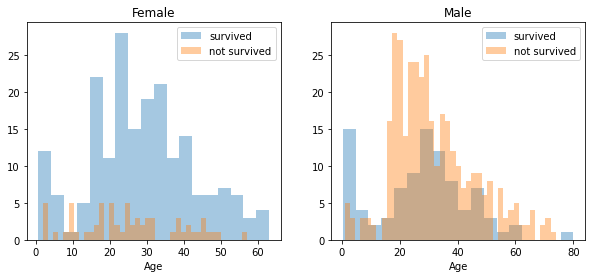

In [11]:
survived='survived'
not_survived='not survived'
fig, axes=plt.subplots(nrows=1, ncols=2,figsize=(10,4))
women=df[df['Sex']=='female']
men=df[df['Sex']=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[0], kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label=not_survived, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

C:\Users\salah\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


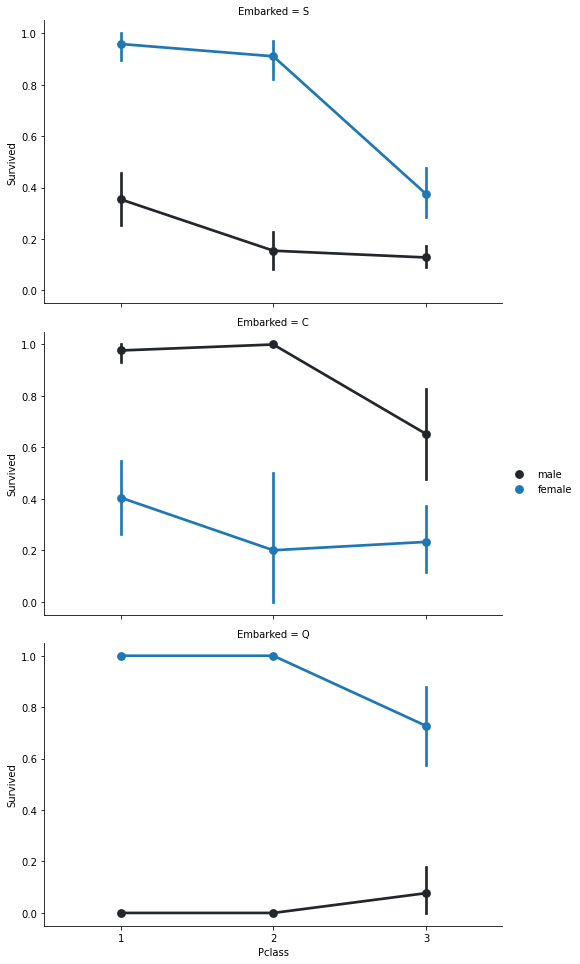

In [12]:
FacetGrid=sns.FacetGrid(df,row='Embarked',size=4.5,aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

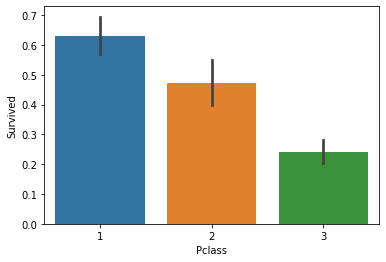

In [13]:
sns.barplot(x='Pclass',y='Survived',data=df)

C:\Users\salah\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


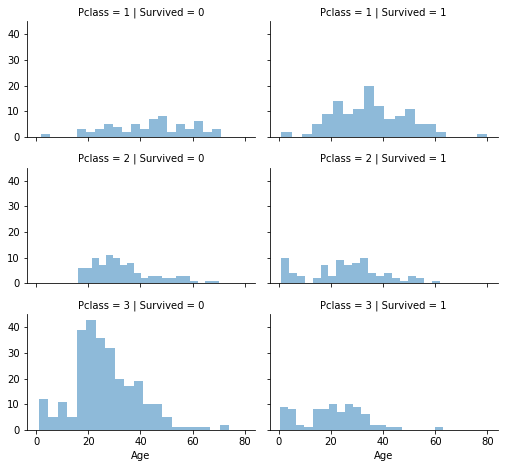

In [14]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [15]:
df.groupby(['Pclass', 'Survived']).mean()

PassengerId        Age     SibSp     Parch       Fare
Pclass Survived                                                       
1      0          410.300000  43.695312  0.287500  0.300000  64.684008
       1          491.772059  35.368197  0.492647  0.389706  95.608029
2      0          452.123711  33.544444  0.319588  0.144330  19.412328
       1          439.080460  25.901566  0.494253  0.643678  22.055700
3      0          453.580645  26.555556  0.672043  0.384409  13.669364
       1          394.058824  20.646118  0.436975  0.420168  13.694887

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
df1=df

In [18]:
df1['Title'] = df1.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [20]:
df1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
df1['Title'] = df1['Title'].replace(['Capt', 'Col','Dr', 'Major', 'Rev'], 'Officier')
df1['Title'] = df1['Title'].replace(['Jonkheer', 'Don','Sir', 'Lady', 'Countess'], 'Royalty')
df1['Title'] = df1['Title'].replace(['Mlle', 'Mme'], 'Miss')
df1['Title'] = df1['Title'].replace(['Ms', 'Mr'], 'Mrs')

In [22]:
df1['Title'].unique()

array(['Mrs', 'Miss', 'Master', 'Royalty', 'Officier'], dtype=object)

C:\Users\salah\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


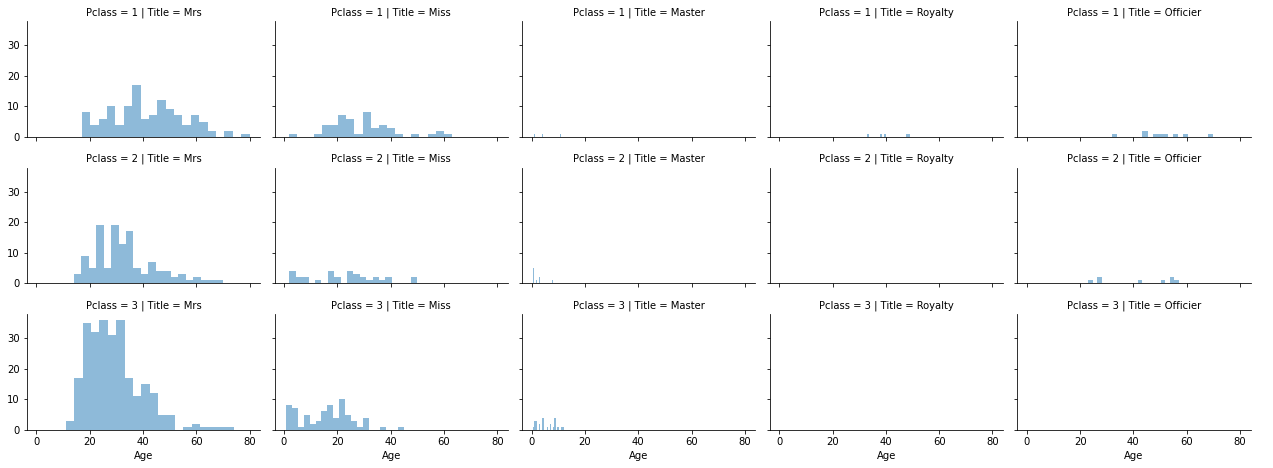

In [23]:
grid = sns.FacetGrid(df1, col='Title', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<AxesSubplot:xlabel='Title', ylabel='Age'>

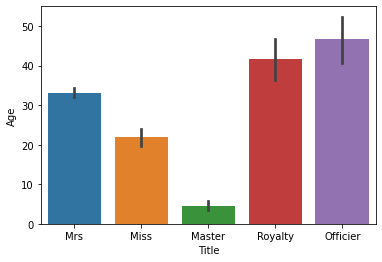

In [24]:
sns.barplot(x='Title',y='Age',data=df1)

<AxesSubplot:xlabel='Title', ylabel='Fare'>

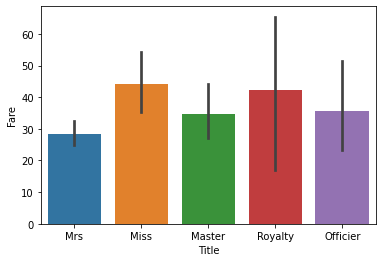

In [25]:
sns.barplot(x='Title',y='Fare',data=df1)

<AxesSubplot:xlabel='Title', ylabel='Pclass'>

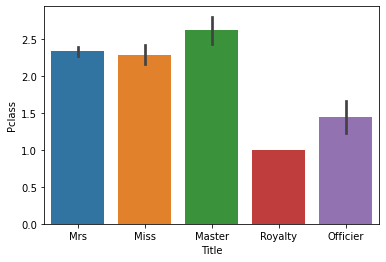

In [26]:
sns.barplot(x='Title',y='Pclass',data=df1)

In [27]:
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

In [28]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mrs,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Officier,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mrs,1


In [34]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
FamilySize       0
dtype: int64

In [35]:
print('Percent of missing "Age" records is %.2f%%' %((df['Age'].isnull().sum()/df.shape[0])*100))

Percent of missing "Age" records is 19.87%


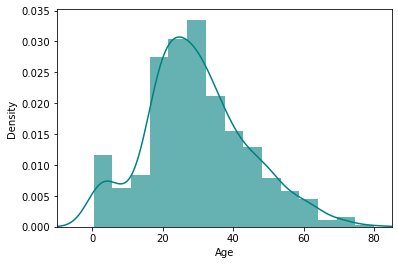

In [36]:
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [37]:
# mean age
print('The mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [38]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((df['Embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


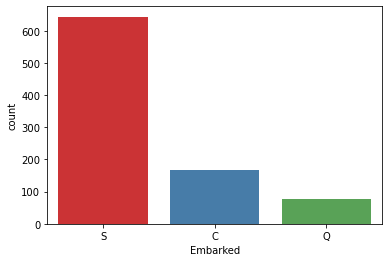

In [39]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set1')
plt.show()

In [40]:
print('The most common boarding port of embarkation is %s.' %df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [43]:
df1 = df.copy()
df1["Age"].fillna(df1["Age"].median(skipna=True), inplace=True)
df1["Embarked"].fillna(df1['Embarked'].value_counts().idxmax(), inplace=True)
df1.drop('Cabin', axis=1, inplace=True)
df1
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [44]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mrs,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mrs,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Officier,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mrs,1


In [45]:
df1['TravelAlone']=np.where((df1["SibSp"]+df1["Parch"])>0, 0, 1)
df1.drop('SibSp', axis=1, inplace=True)
df1.drop('Parch', axis=1, inplace=True)

In [46]:
df1=pd.get_dummies(df1, columns=["Pclass","Embarked","Sex"])
df1.drop('Sex_female', axis=1, inplace=True)
df1.drop('PassengerId', axis=1, inplace=True)
df1.drop('Name', axis=1, inplace=True)
df1.drop('Ticket', axis=1, inplace=True)
df1.drop('Title', axis=1, inplace=True)

In [47]:
df1.head()

,Survived,Age,Fare,FamilySize,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,2,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,2,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,2,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,1,0,0,1,0,0,1,1


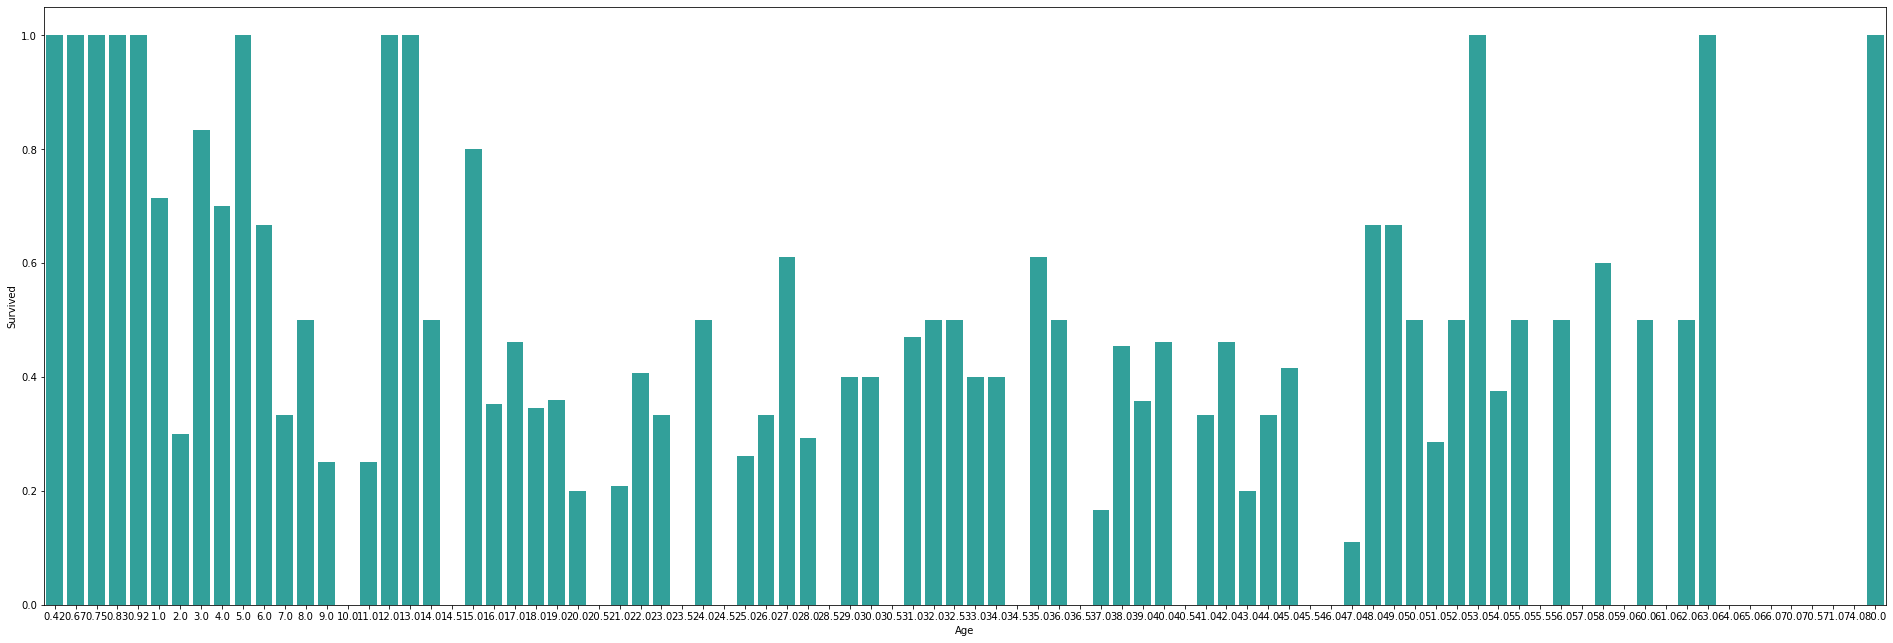

In [48]:
plt.figure(figsize=(33,11))
avg_survival_by_age = df1[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_by_age, color="LightSeaGreen")
plt.show()

In [49]:

df1['IsMinor']=np.where(df1['Age']<=16, 1, 0)
df1

,Survived,Age,Fare,FamilySize,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,2,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,2,0,1,0,0,1,0,0,0,0
2,1,26.0,7.9250,1,1,0,0,1,0,0,1,0,0
3,1,35.0,53.1000,2,0,1,0,0,0,0,1,0,0
4,0,35.0,8.0500,1,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,1,0,0,0,1,1,0
887,1,19.0,30.0000,1,1,1,0,0,0,0,1,0,0
888,0,28.0,23.4500,4,0,0,0,1,0,0,1,0,0
889,1,26.0,30.0000,1,1,1,0,0,1,0,0,1,0


In [50]:
X= df1.iloc[:,1:].values
y = df1.iloc[:,0].values

In [51]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [52]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(X_train, y_train)  #fitting training data
y_pred  = logreg.predict(X_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.79


C:\Users\salah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Age', ylabel='Survived'>

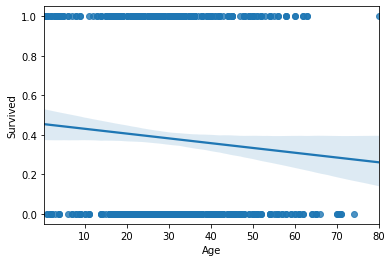

In [53]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df1)

<AxesSubplot:xlabel='IsMinor', ylabel='Survived'>

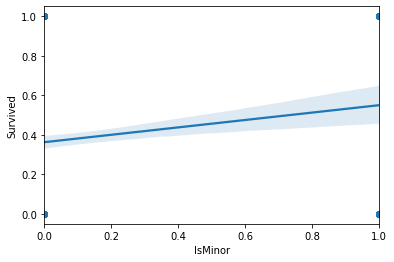

In [54]:
sns.regplot(x='IsMinor',y='Survived',data=df1)

<AxesSubplot:xlabel='Sex_male', ylabel='Survived'>

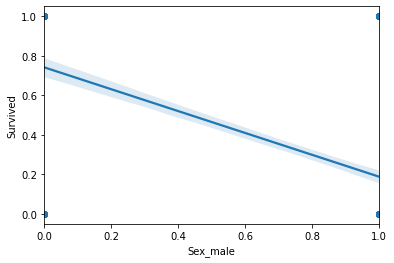

In [55]:
sns.regplot(x='Sex_male',y='Survived',data=df1)

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

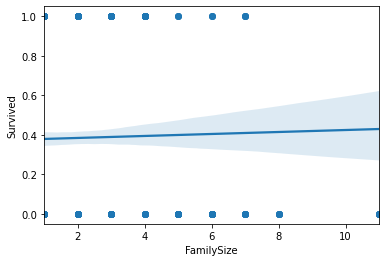

In [56]:
sns.regplot(x='FamilySize',y='Survived',data=df1)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

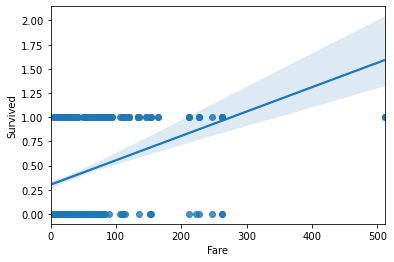

In [57]:
sns.regplot(x='Fare',y='Survived',data=df1)

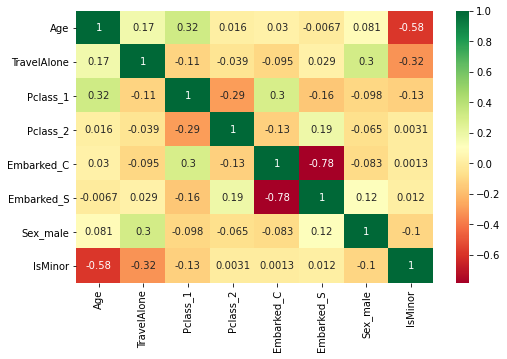

In [58]:
Selected_features = ['Age','TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = df1[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

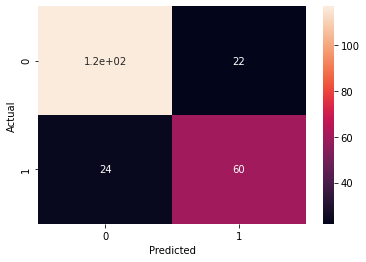

In [59]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       139
           1       0.73      0.71      0.72        84

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

